In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
# Load the ratings data
ratings = pd.read_csv('ratings.csv')
# Load the movies data
movies = pd.read_csv('movies.csv')

# Display the first few rows of the datasets
print(ratings.head())
print(movies.head())


   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [18]:
# Basic information about the ratings dataset
print(ratings.info())

# Descriptive statistics of the ratings
print(ratings.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.000000    1199.000000       3.000000  1.019124e+09
50%       325.000000    2991.000000       3.500000  1.186087e+09
75%       477.000000    8122.000000       4.000000  1.435994e+09
max       610.000000  193609.000000       5.000000  1.537799e+09


In [19]:
# Basic information about the movies dataset
print(movies.info())

# Display the first few rows
print(movies.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [20]:
# Check for missing values in ratings
print(ratings.isnull().sum())

# Check for missing values in movies
print(movies.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
movieId    0
title      0
genres     0
dtype: int64


In [21]:
# Calculate average rating for each movie
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()

# Merge with movies data to get movie titles
average_ratings = average_ratings.merge(movies, on='movieId')

# Display the first few rows
print(average_ratings.head())

   movieId    rating                               title  \
0        1  3.920930                    Toy Story (1995)   
1        2  3.431818                      Jumanji (1995)   
2        3  3.259615             Grumpier Old Men (1995)   
3        4  2.357143            Waiting to Exhale (1995)   
4        5  3.071429  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [22]:
# Top 10 movies with highest average ratings
top_rated_movies = average_ratings.sort_values(by='rating', ascending=False).head(10)
print(top_rated_movies)

      movieId  rating                                      title  \
7638    88448     5.0      Paper Birds (Pájaros de papel) (2010)   
8089   100556     5.0                 Act of Killing, The (2012)   
9065   143031     5.0                            Jump In! (2007)   
9076   143511     5.0                               Human (2015)   
9078   143559     5.0                        L.A. Slasher (2015)   
4245     6201     5.0                           Lady Jane (1986)   
8136   102217     5.0             Bill Hicks: Revelations (1993)   
8130   102084     5.0               Justice League: Doom (2012)    
4240     6192     5.0  Open Hearts (Elsker dig for evigt) (2002)   
9104   145994     5.0                     Formula of Love (1984)   

                        genres  
7638              Comedy|Drama  
8089               Documentary  
9065      Comedy|Drama|Romance  
9076               Documentary  
9078      Comedy|Crime|Fantasy  
4245             Drama|Romance  
8136                

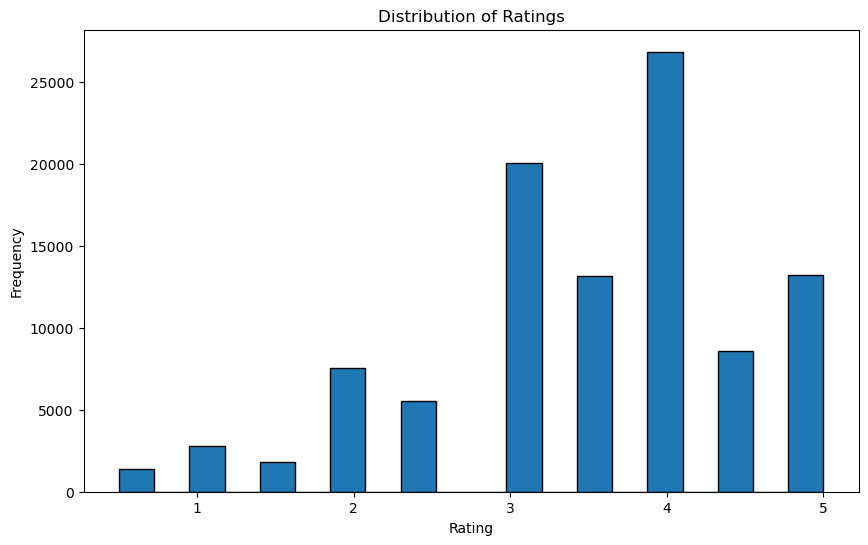

In [23]:
# Plot a histogram of ratings
plt.figure(figsize=(10, 6))
plt.hist(ratings['rating'], bins=20, edgecolor='k')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

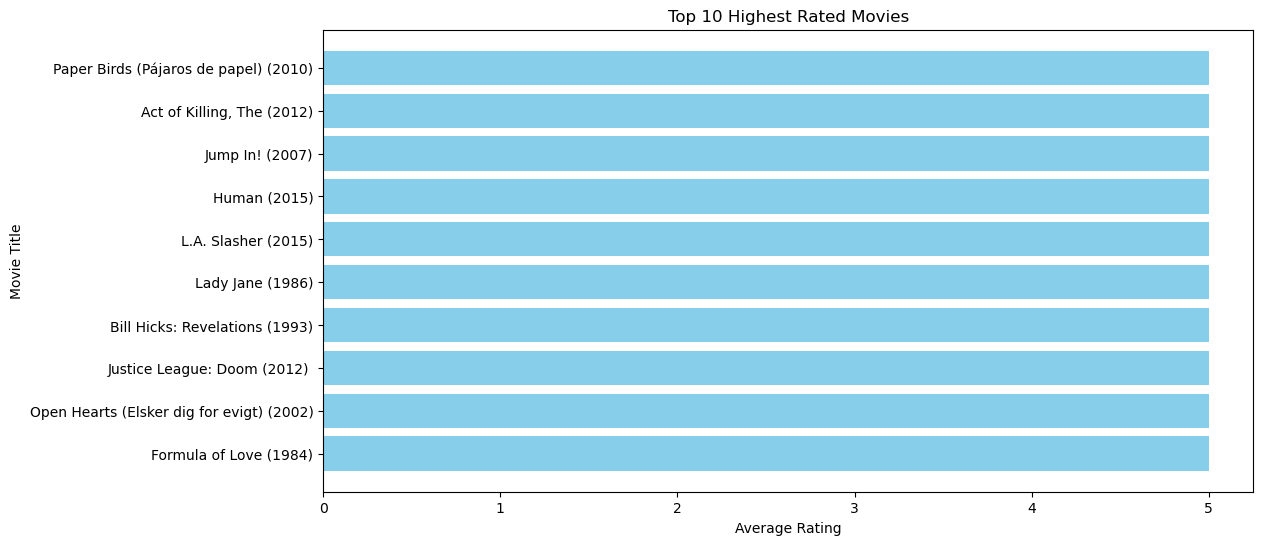

In [24]:
# Plot bar chart of top rated movies
plt.figure(figsize=(12, 6))
plt.barh(top_rated_movies['title'], top_rated_movies['rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Highest Rated Movies')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest rated movie at the top
plt.show()

In [25]:
# Save the average ratings to a CSV file
average_ratings.to_csv('average_movie_ratings.csv', index=False)